# Simple example of integrating the hydrogen wavefunction

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from numerov.rydberg import RydbergState

In [2]:
n = 10
l = 5
hydrogen = RydbergState("H", n=n, l=l, j=l + 0.5, dz=0.01, run_backward=True)

In [3]:
hydrogen.integrate()
z_list, x_list = hydrogen.z_list, hydrogen.x_list

xmin=5.843940270618244 was not chosen good (sum_small_z=0.0010983732857292887), and the wavefunction is positive at the inner boundary, so we could not fix it.


In [4]:
from sympy.abc import r as sympy_r
from sympy.physics import hydrogen as sympy_hydrogen
from sympy.utilities.lambdify import lambdify


def calc_R(n: int, l: int, x_list: np.ndarray) -> np.ndarray:
    if n <= 35 or False:
        R_nl = lambdify(sympy_r, sympy_hydrogen.R_nl(hydrogen.n, hydrogen.l, sympy_r, Z=1))
        R_list = R_nl(x_list)
    else:  # some weird sympy bug if trying to use lambdify R_nl for n > 35
        R_list = np.zeros_like(x_list)
        for i, x in enumerate(x_list):
            R_list[i] = sympy_hydrogen.R_nl(n, l, x, Z=1)
    return R_list


sympy_R_list = calc_R(hydrogen.n, hydrogen.l, hydrogen.x_list)
sympy_u_list = sympy_R_list * hydrogen.x_list
sympy_w_list = sympy_u_list / np.sqrt(hydrogen.z_list)

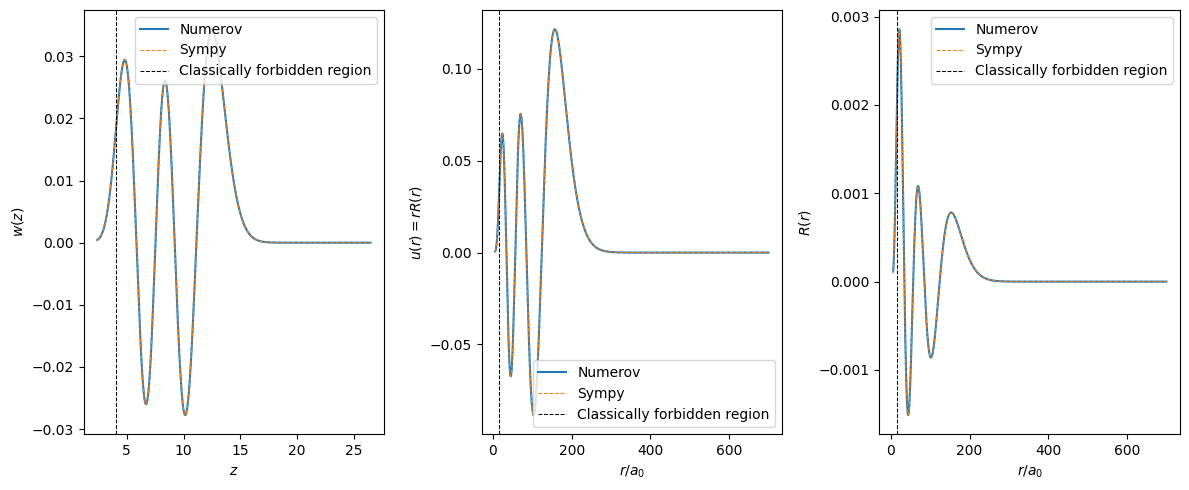

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
classical_zmin = hydrogen.calc_classical_zmin()

axs[0].plot(z_list, hydrogen.w_list, "C0-", label="Numerov")
axs[0].plot(z_list, sympy_w_list, "C1--", lw=0.75, label="Sympy")
axs[0].axvline(classical_zmin, color="k", ls="--", lw=0.75, label="Classically forbidden region")
axs[0].set_xlabel(r"$z$")
axs[0].set_ylabel(r"$w(z)$")
axs[0].legend()

axs[1].plot(x_list, hydrogen.u_list, "C0-", label="Numerov")
axs[1].plot(x_list, sympy_u_list, "C1--", lw=0.75, label="Sympy")
axs[1].axvline(classical_zmin**2, color="k", ls="--", lw=0.75, label="Classically forbidden region")
axs[1].set_xlabel(r"$r / a_0$")
axs[1].set_ylabel(r"$u(r) = r R(r)$")
axs[1].legend()

axs[2].plot(x_list, hydrogen.R_list, "C0-", label="Numerov")
axs[2].plot(x_list, sympy_R_list, "C1--", lw=0.75, label="Sympy")
axs[2].axvline(classical_zmin**2, color="k", ls="--", lw=0.75, label="Classically forbidden region")
axs[2].set_xlabel(r"$r / a_0$")
axs[2].set_ylabel(r"$R(r)$")
axs[2].legend()

fig.tight_layout()
plt.show()

Hydrogen n=10, l=5, j=5.5: energy=-0.005


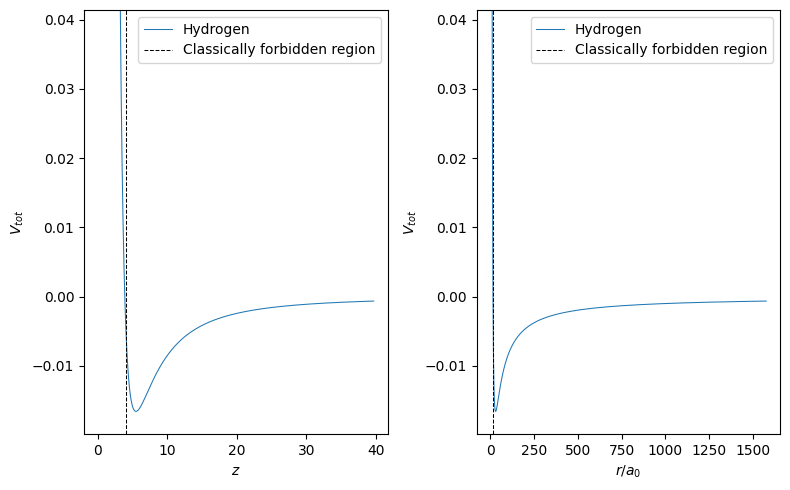

In [6]:
print(f"Hydrogen n={hydrogen.n}, l={hydrogen.l}, j={hydrogen.j}: energy={hydrogen.energy}")

fig, axs = plt.subplots(1, 2, figsize=(8, 5))
new_z_list = np.linspace(hydrogen.dz, 1.5 * np.sqrt(hydrogen.xmax), 10_000)
hydrogen_V_Tot = hydrogen.calc_V_tot(new_z_list)
Vmin = np.min(hydrogen_V_Tot)

axs[0].plot(new_z_list, hydrogen_V_Tot, "C0", lw=0.75, label="Hydrogen")
axs[0].axvline(classical_zmin, color="k", ls="--", lw=0.75, label="Classically forbidden region")
axs[0].set_xlabel(r"$z$")
axs[0].set_ylabel(r"$V_{tot}$")
axs[0].set_ylim(1.2 * Vmin, 2.5 * abs(Vmin))
axs[0].legend()

axs[1].plot(np.power(new_z_list, 2), hydrogen_V_Tot, "C0", lw=0.75, label="Hydrogen")
axs[1].axvline(classical_zmin**2, color="k", ls="--", lw=0.75, label="Classically forbidden region")
axs[1].set_xlabel(r"$r / a_0$")
axs[1].set_ylabel(r"$V_{tot}$")
axs[1].set_ylim(1.2 * Vmin, 2.5 * abs(Vmin))
axs[1].legend()

fig.tight_layout()
plt.show()